## Stoke Prediction Notebook

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "healthcare-dataset-stroke-data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/stroke-prediction-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\mmice\tensorflow_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\mmice\AppData\Local\Temp\ipykernel_22828\2395192275.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


## Exploratory Data Analysis Section

In [2]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#I use this to gather the most basic information about my dataframe

print('Dataframe Columns',"\n",df.columns)
print("=" * 70)
print('Shape of the dataframe',"\n",df.shape)
print("=" * 70)
print('Dataframe info',"\n",df.info())
print("=" * 70)
print('Dataframe basic stats',"\n",df.describe())
print("=" * 70)

Dataframe Columns 
 Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Shape of the dataframe 
 (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  strok

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

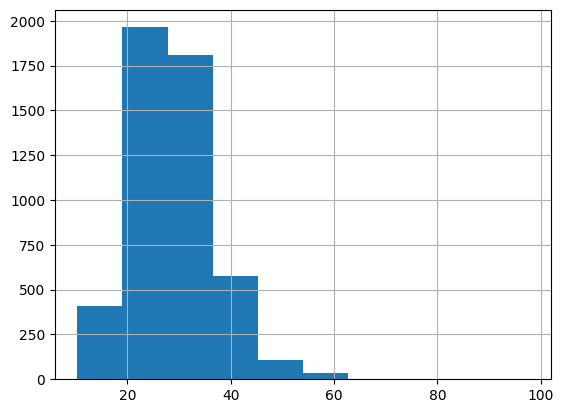

In [5]:
#Check distribution for BMI since it is missing values
df['bmi'].hist()

In [6]:
#I will impute with median values since data is right tail skewed
df['bmi'].fillna(df['bmi'].median(), inplace=True)
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


C:\Users\mmice\AppData\Local\Temp\ipykernel_22828\1803305056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [7]:
#Cbecking for duplicates
df.duplicated().sum()

0

## Numerical Columns EDA

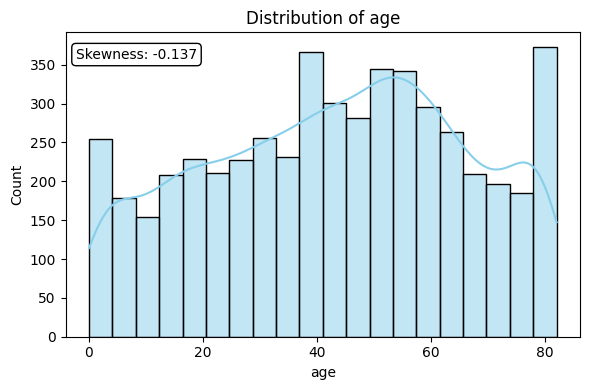

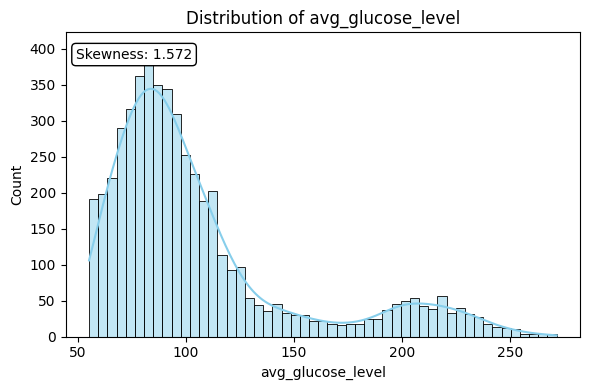

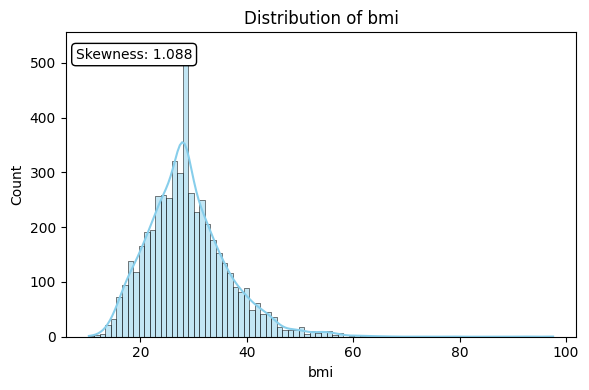

In [8]:
#Check for distibution and skewness of numerical values

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    skew_val = df[col].dropna().skew()
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, color="skyblue", edgecolor="black")
    plt.title(f'Distribution of {col}')
    
    # Add skewness text inside the plot at the top-left corner
    plt.text(
        0.02, 0.95, f'Skewness: {skew_val:.3f}',
        ha='left', va='top', transform=plt.gca().transAxes,
        fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )
    
    plt.tight_layout()
    plt.show()

In [9]:
#Two of the numerical values are skewed, so I will add the log transformation value to the dataframe in their own columns
import numpy as np

df['log_bmi'] = np.log1p(df['bmi'])
df['log_glucose'] = np.log1p(df['avg_glucose_level'])

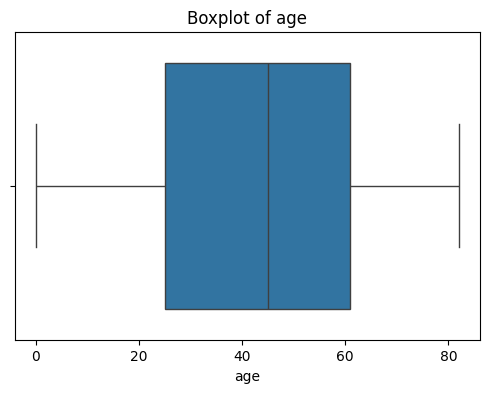

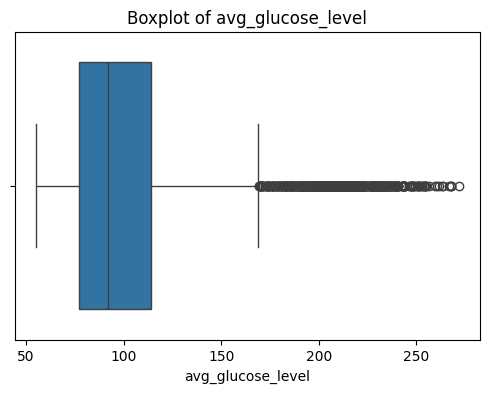

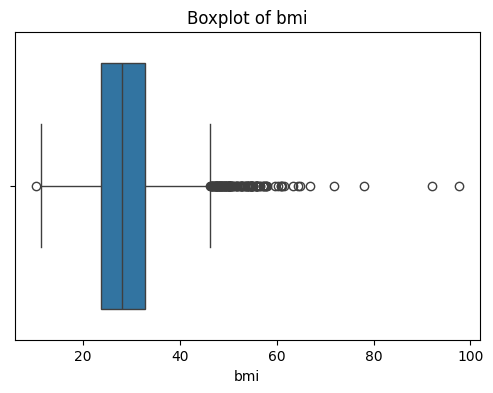

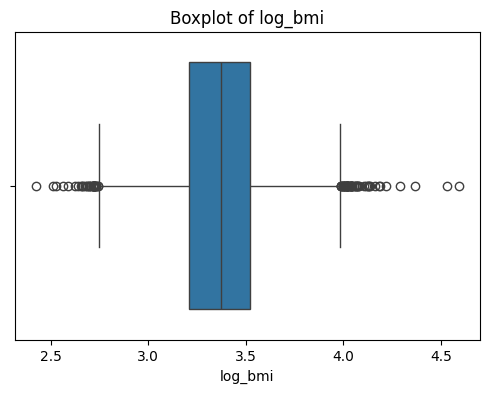

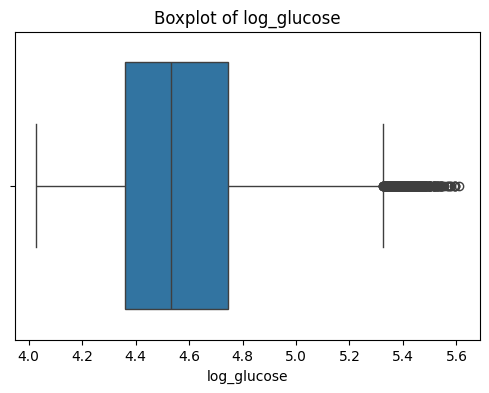

In [10]:
#Checking for outliers in our numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'avg_glucose_level', 'bmi', 'log_bmi', 'log_glucose']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [11]:
#Although there are clearly outliers, it is possible that this data is still accurate and should be included. 
#I have decided to search for only extreme outliers based on research on blood glucose and BMI levels
# For my glucose level column, we have values between ~170 and ~300 that appear as outliers, but are realistic blood glucose levels for an individual 
# that is not in good health. For this reason I will keep them all
#For BMI it appears that I have a few values that are possible but on the extreme end, I will investigate further to see how many
# values there actually are

In [12]:
# Check blood glucose values greater than 600 mg/dL
high_glucose = df[df['avg_glucose_level'] > 600]
print("Blood glucose values over 600 mg/dL:")
print(high_glucose[['avg_glucose_level']])

# Check BMI values greater than 80
high_bmi = df[df['bmi'] > 80]
print("\nBMI values over 80:")
print(high_bmi[['bmi']])

Blood glucose values over 600 mg/dL:
Empty DataFrame
Columns: [avg_glucose_level]
Index: []

BMI values over 80:
       bmi
2128  97.6
4209  92.0


In [13]:
#I am going to keep the two extreme values, assuming that since there are such few that they were accurately recorded 

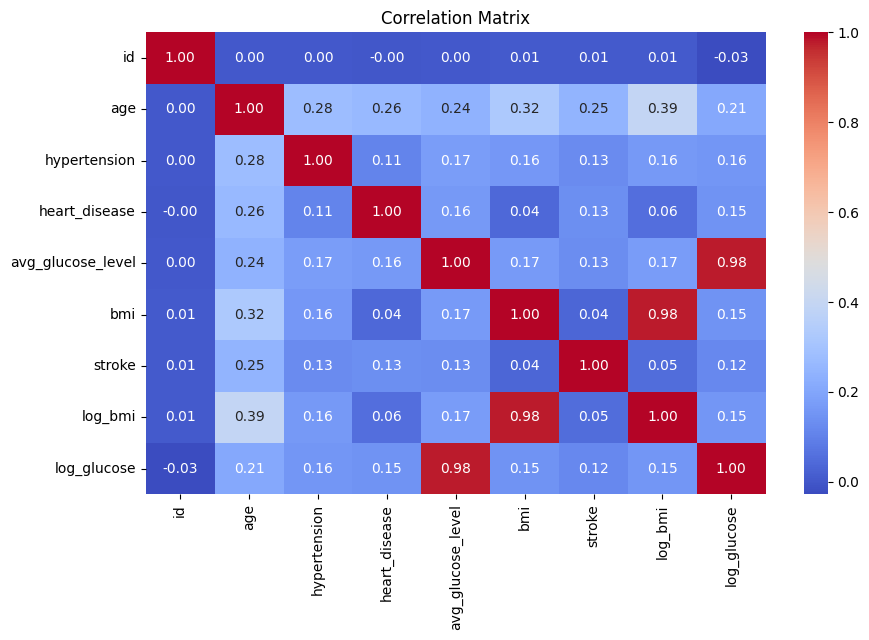

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Categorical Columns EDA

In [15]:
#Time to take a look at categorical columns. Will look at value counts as percentages
cat_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in cat_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts(normalize=True)}\n")

Value counts for gender:
gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

Value counts for hypertension:
hypertension
0    0.902544
1    0.097456
Name: proportion, dtype: float64

Value counts for heart_disease:
heart_disease
0    0.945988
1    0.054012
Name: proportion, dtype: float64

Value counts for ever_married:
ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64

Value counts for work_type:
work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: proportion, dtype: float64

Value counts for Residence_type:
Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64

Value counts for smoking_status:
smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64



In [16]:
#The gender column has an extremely rare entry of Other, let me take a look at how many values it actually is
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [17]:
#Since Other only occurs one time, I will drop it from the Dataframe
df = df[df['gender'] != 'Other']

## Examining the distribution of our target column

In [18]:
#Exploring our target variable
df['stroke'].value_counts(normalize=True)

stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64

In [19]:
#Our target column is largely imbalanced, and must be accounted for in machine learning models.

## Test Train Split and Encoding/Preprocessing

In [20]:
from sklearn.model_selection import train_test_split

y = df['stroke']

X_original = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
                 'smoking_status']]

X_log = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'log_glucose', 'log_bmi',
            'smoking_status']]

# Split original features
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y, test_size=0.2, random_state=42, stratify=y
)

# Split log-transformed features
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
# Define categorical columns by category count
binary_cat_cols = ['gender', 'ever_married', 'Residence_type']
multi_cat_cols = ['work_type', 'smoking_status']

# Define numeric columns explicitly 
num_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Define numeric columns explicitly for log 
num_cols_log = ['age', 'hypertension', 'heart_disease', 'log_glucose', 'log_bmi']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

preprocessor_orig = ColumnTransformer(
    transformers=[
        ('bin_cat', OrdinalEncoder(), binary_cat_cols),
        ('multi_cat', OneHotEncoder(drop='first', handle_unknown='ignore'), multi_cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

In [23]:
preprocessor_log = ColumnTransformer(
    transformers=[
        ('bin_cat', OrdinalEncoder(), binary_cat_cols),
        ('multi_cat', OneHotEncoder(drop='first', handle_unknown='ignore'), multi_cat_cols),
        ('num', StandardScaler(), num_cols_log)
    ]

)


## Logistic Regression Models

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create pipeline combining preprocessing + classifier
pipeline_orig = Pipeline([
    ('preprocess', preprocessor_orig),
    ('clf', LogisticRegression(max_iter=2000,class_weight='balanced'))
])

pipeline_log = Pipeline([
    ('preprocess', preprocessor_log),
    ('clf', LogisticRegression(max_iter=2000,class_weight='balanced'))
])

In [25]:
pipeline_orig.fit(X_train_orig, y_train_orig)
pipeline_log.fit(X_train_log, y_train_log)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('bin_cat', OrdinalEncoder(),
                                                  ['gender', 'ever_married',
                                                   'Residence_type']),
                                                 ('multi_cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['work_type',
                                                   'smoking_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'log_glucose',
                                                   'log_bmi'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [26]:
y_pred_orig = pipeline_orig.predict(X_test_orig)
y_pred_log = pipeline_log.predict(X_test_log)

y_proba_orig = pipeline_orig.predict_proba(X_test_orig)[:, 1]
y_proba_log = pipeline_log.predict_proba(X_test_log)[:, 1]

Original Features
[[714 258]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

ROC AUC: 0.8392798353909465

Log-Transformed Features
[[710 262]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.73      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.94      0.73      0.81      1022

ROC AUC: 0.8406995884773663


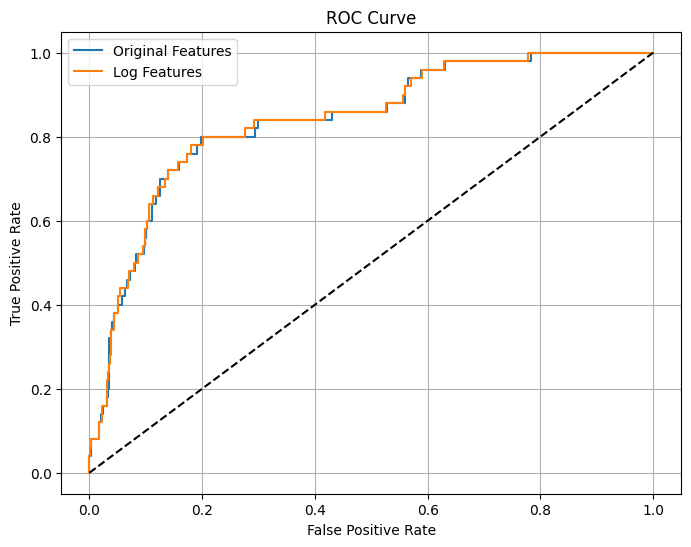

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# For original features
print("Original Features")
print(confusion_matrix(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig))
print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_orig))

# For log-transformed features
print("\nLog-Transformed Features")
print(confusion_matrix(y_test_log, y_pred_log))
print(classification_report(y_test_log, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test_log, y_proba_log))

#Plot ROC Curve (Visual Comparison)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, y_proba_orig)
fpr_log, tpr_log, _ = roc_curve(y_test_log, y_proba_log)

plt.figure(figsize=(8,6))
plt.plot(fpr_orig, tpr_orig, label='Original Features')
plt.plot(fpr_log, tpr_log, label='Log Features')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## Logistic regression with best parameters and adjusted thresholds

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid_logreg = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],
    'clf__max_iter': [100, 2000]
}

grid_search_logreg = GridSearchCV(pipeline_orig, param_grid_logreg, 
                                  cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search_logreg.fit(X_train_orig, y_train_orig)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best cross-validated ROC AUC:", grid_search_logreg.best_score_)



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'clf__C': 0.01, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best cross-validated ROC AUC: 0.8412152357589375


In [30]:
pipeline_orig_tuned = Pipeline([
    ('preprocess', preprocessor_orig),
    ('clf', LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='lbfgs', class_weight='balanced'))
])

pipeline_log_tuned = Pipeline([
    ('preprocess', preprocessor_log),
    ('clf', LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='lbfgs', class_weight='balanced'))
])

In [31]:
pipeline_orig_tuned.fit(X_train_orig, y_train_orig)
pipeline_log_tuned.fit(X_train_log, y_train_log)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('bin_cat', OrdinalEncoder(),
                                                  ['gender', 'ever_married',
                                                   'Residence_type']),
                                                 ('multi_cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['work_type',
                                                   'smoking_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'log_glucose',
                                                   'log_bmi'])])),
                ('clf', LogisticRegression(C=0.01, class_weight='balanced'))])

In [83]:
thresholds = [0.1, 0.2, 0.3, 0.4]

for threshold in thresholds:
    print(f"\n===== Threshold: {threshold} =====")

    # Apply threshold to predicted probabilities
    y_pred_orig_thresh = (y_proba_orig_tuned >= threshold).astype(int)
    y_pred_log_thresh = (y_proba_log_tuned >= threshold).astype(int)

    # Original features
    print("\n--- Original Features ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_orig_thresh))
    print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_orig_thresh))
    print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_orig_tuned))

    # Log-transformed features
    print("\n--- Log-Transformed Features ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log_thresh))
    print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log_thresh))
    print("ROC AUC:", roc_auc_score(y_test_log, y_proba_log_tuned))



===== Threshold: 0.1 =====

--- Original Features ---
Confusion Matrix:
 [[237 735]
 [  1  49]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.39       972
           1       0.06      0.98      0.12        50

    accuracy                           0.28      1022
   macro avg       0.53      0.61      0.25      1022
weighted avg       0.95      0.28      0.38      1022

ROC AUC: 0.8375720164609054

--- Log-Transformed Features ---
Confusion Matrix:
 [[236 736]
 [  1  49]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.24      0.39       972
           1       0.06      0.98      0.12        50

    accuracy                           0.28      1022
   macro avg       0.53      0.61      0.25      1022
weighted avg       0.95      0.28      0.38      1022

ROC AUC: 0.8387448559670783

===== Threshold: 0.2 =====

--- Original Features ---
Confusion Ma

## SVC Models

In [35]:
from sklearn.svm import SVC

In [36]:
svc = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

In [37]:
from sklearn.pipeline import Pipeline

pipeline_svc_orig = Pipeline([
    ('preprocessor', preprocessor_orig),  # Your existing ColumnTransformer
    ('classifier', svc)
])

pipeline_svc_log = Pipeline([
    ('preprocessor', preprocessor_log),  # For log-transformed features
    ('classifier', svc)
])


In [38]:
pipeline_svc_orig.fit(X_train_orig, y_train_orig)
pipeline_svc_log.fit(X_train_log, y_train_log)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('bin_cat', OrdinalEncoder(),
                                                  ['gender', 'ever_married',
                                                   'Residence_type']),
                                                 ('multi_cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['work_type',
                                                   'smoking_status']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'log_glucose',
                                                   'log_bmi'])])),
                ('classifier',
                 SVC(class_weight='balanced', probability=True,
                     random_state=42))])

In [39]:
# For original features
y_pred_svc_orig = pipeline_svc_orig.predict(X_test_orig)
y_proba_svc_orig = pipeline_svc_orig.predict_proba(X_test_orig)[:, 1]

# For log-transformed features
y_pred_svc_log = pipeline_svc_log.predict(X_test_log)
y_proba_svc_log = pipeline_svc_log.predict_proba(X_test_log)[:, 1]


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Original Features
print("SVC - Original Features")
print(confusion_matrix(y_test_orig, y_pred_svc_orig))
print(classification_report(y_test_orig, y_pred_svc_orig))
print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_svc_orig))

# Log Features
print("\nSVC - Log-Transformed Features")
print(confusion_matrix(y_test_log, y_pred_svc_log))
print(classification_report(y_test_log, y_pred_svc_log))
print("ROC AUC:", roc_auc_score(y_test_log, y_proba_svc_log))

SVC - Original Features
[[716 256]
 [ 12  38]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.74      0.81      1022

ROC AUC: 0.7910905349794238

SVC - Log-Transformed Features
[[713 259]
 [ 12  38]]
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.73      0.81      1022

ROC AUC: 0.7972633744855967


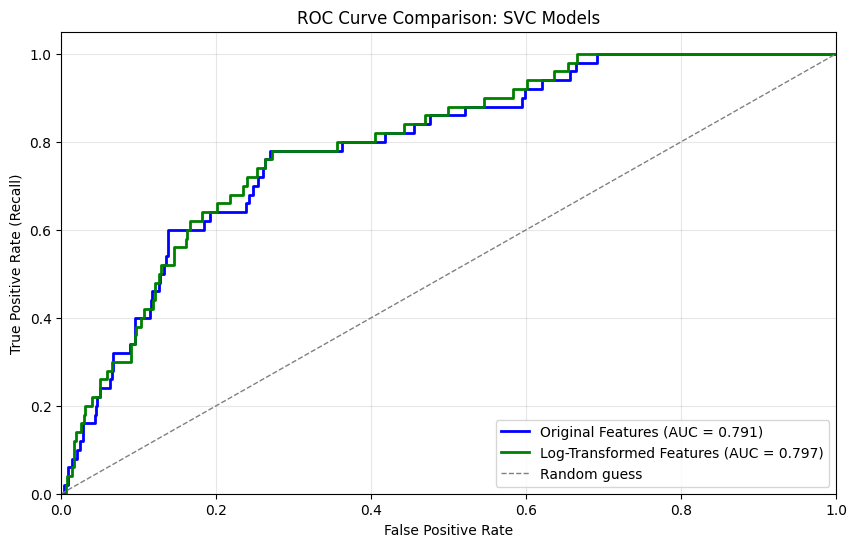

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC for original features
fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, y_proba_svc_orig)
roc_auc_orig = roc_auc_score(y_test_orig, y_proba_svc_orig)

# Compute ROC curve and AUC for log-transformed features
fpr_log, tpr_log, _ = roc_curve(y_test_log, y_proba_svc_log)
roc_auc_log = roc_auc_score(y_test_log, y_proba_svc_log)

plt.figure(figsize=(10,6))
plt.plot(fpr_orig, tpr_orig, color='blue', lw=2, label=f'Original Features (AUC = {roc_auc_orig:.3f})')
plt.plot(fpr_log, tpr_log, color='green', lw=2, label=f'Log-Transformed Features (AUC = {roc_auc_log:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: SVC Models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()



## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [50]:
# Pipeline for original features
pipeline_rf_orig = Pipeline([
    ('preprocessor', preprocessor_orig),  # your existing preprocessor
    ('classifier', rf_clf)
])

# Pipeline for log-transformed features
pipeline_rf_log = Pipeline([
    ('preprocessor', preprocessor_log),  # your existing log preprocessor
    ('classifier', rf_clf)
])

# Fit the models
pipeline_rf_orig.fit(X_train_orig, y_train_orig)
pipeline_rf_log.fit(X_train_log, y_train_log)

# Predictions and predicted probabilities
y_pred_rf_orig = pipeline_rf_orig.predict(X_test_orig)
y_proba_rf_orig = pipeline_rf_orig.predict_proba(X_test_orig)[:, 1]

y_pred_rf_log = pipeline_rf_log.predict(X_test_log)
y_proba_rf_log = pipeline_rf_log.predict_proba(X_test_log)[:, 1]

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest - Original Features")
print(confusion_matrix(y_test_orig, y_pred_rf_orig))
print(classification_report(y_test_orig, y_pred_rf_orig))
print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_rf_orig))

print("\nRandom Forest - Log-Transformed Features")
print(confusion_matrix(y_test_log, y_pred_rf_log))
print(classification_report(y_test_log, y_pred_rf_log))
print("ROC AUC:", roc_auc_score(y_test_log, y_proba_rf_log))

Random Forest - Original Features
[[971   1]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC: 0.7903909465020575

Random Forest - Log-Transformed Features
[[970   2]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC: 0.773775720164609


## Random Forest Tuned

In [51]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
}

pipeline_rf_orig = Pipeline([
    ('preprocessor', preprocessor_orig),
    ('classifier', rf)
])

grid_search = GridSearchCV(pipeline_rf_orig, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_orig, y_train_orig)

print("Best params:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC AUC: 0.8352035489117753


Random Forest - Original Features
[[960  12]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.29      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

ROC AUC: 0.8136625514403293

Random Forest - Log-Transformed Features
[[960  12]
 [ 45   5]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.29      0.10      0.15        50

    accuracy                           0.94      1022
   macro avg       0.62      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

ROC AUC: 0.8138991769547326


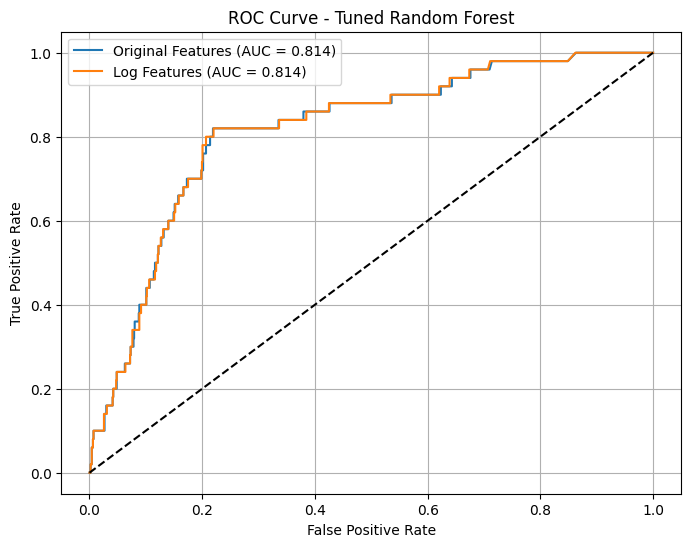

In [52]:
# Define tuned Random Forest classifiers with best params
rf_orig_tuned = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # Add if you want to keep class balance
)

rf_log_tuned = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

# Create pipelines
pipeline_rf_orig_tuned = Pipeline([
    ('preprocessor', preprocessor_orig),
    ('classifier', rf_orig_tuned)
])

pipeline_rf_log_tuned = Pipeline([
    ('preprocessor', preprocessor_log),
    ('classifier', rf_log_tuned)
])

# Fit models
pipeline_rf_orig_tuned.fit(X_train_orig, y_train_orig)
pipeline_rf_log_tuned.fit(X_train_log, y_train_log)

# Predict & predict_proba
y_pred_orig_tuned = pipeline_rf_orig_tuned.predict(X_test_orig)
y_proba_orig_tuned = pipeline_rf_orig_tuned.predict_proba(X_test_orig)[:, 1]

y_pred_log_tuned = pipeline_rf_log_tuned.predict(X_test_log)
y_proba_log_tuned = pipeline_rf_log_tuned.predict_proba(X_test_log)[:, 1]

# Print evaluation metrics
print("Random Forest - Original Features")
print(confusion_matrix(y_test_orig, y_pred_orig_tuned))
print(classification_report(y_test_orig, y_pred_orig_tuned))
print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_orig_tuned))

print("\nRandom Forest - Log-Transformed Features")
print(confusion_matrix(y_test_log, y_pred_log_tuned))
print(classification_report(y_test_log, y_pred_log_tuned))
print("ROC AUC:", roc_auc_score(y_test_log, y_proba_log_tuned))

# Plot combined ROC curves
fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, y_proba_orig_tuned)
fpr_log, tpr_log, _ = roc_curve(y_test_log, y_proba_log_tuned)

plt.figure(figsize=(8,6))
plt.plot(fpr_orig, tpr_orig, label=f'Original Features (AUC = {roc_auc_score(y_test_orig, y_proba_orig_tuned):.3f})')
plt.plot(fpr_log, tpr_log, label=f'Log Features (AUC = {roc_auc_score(y_test_log, y_proba_log_tuned):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Random Forest')
plt.legend()
plt.grid()
plt.show()


In [54]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


# Use your existing preprocessor_orig for original features
rf_tuned_smote = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=42,
    class_weight=None  # With SMOTE, class_weight usually set to None
)

pipeline_rf_smote_orig = ImbPipeline([
    ('preprocessor', preprocessor_orig),
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_tuned_smote)
])

# Fit to training data
pipeline_rf_smote_orig.fit(X_train_orig, y_train_orig)

# Predict and evaluate
y_pred_rf_smote_orig = pipeline_rf_smote_orig.predict(X_test_orig)
y_proba_rf_smote_orig = pipeline_rf_smote_orig.predict_proba(X_test_orig)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Random Forest with SMOTE - Original Features")
print(confusion_matrix(y_test_orig, y_pred_rf_smote_orig))
print(classification_report(y_test_orig, y_pred_rf_smote_orig))
print("ROC AUC:", roc_auc_score(y_test_orig, y_proba_rf_smote_orig))


Random Forest with SMOTE - Original Features
[[945  27]
 [ 43   7]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.21      0.14      0.17        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.92      0.93      0.93      1022

ROC AUC: 0.7765946502057612


## XGBoost Classifier

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [57]:
pipeline_xgb_orig = Pipeline([
    ('preprocessor', preprocessor_orig),
    ('classifier', xgb)
])

pipeline_xgb_log = Pipeline([
    ('preprocessor', preprocessor_log),
    ('classifier', xgb)
])


In [58]:
#fit to the training data
pipeline_xgb_orig.fit(X_train_orig, y_train_orig)
pipeline_xgb_log.fit(X_train_log, y_train_log)

# Predict using the tuned grid search model
y_pred_xgb_orig = pipeline_xgb_orig.predict(X_test_orig)
y_proba_xgb_orig = pipeline_xgb_orig.predict_proba(X_test_orig)[:, 1]  # For ROC AUC

# Predict using the tuned grid search model
y_pred_xgb_log = pipeline_xgb_log.predict(X_test_log)
y_proba_xgb_log = pipeline_xgb_log.predict_proba(X_test_log)[:, 1]  # For ROC AUC

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_orig))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_orig))
print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_orig))

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_log))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_log))
print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_log))


C:\Users\mmice\tensorflow_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mmice\tensorflow_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[958  14]
 [ 45   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       972
           1       0.26      0.10      0.14        50

    accuracy                           0.94      1022
   macro avg       0.61      0.54      0.56      1022
weighted avg       0.92      0.94      0.93      1022

ROC AUC:
 0.7974074074074073
Confusion Matrix:
 [[956  16]
 [ 46   4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.20      0.08      0.11        50

    accuracy                           0.94      1022
   macro avg       0.58      0.53      0.54      1022
weighted avg       0.92      0.94      0.93      1022

ROC AUC:
 0.7748148148148148


## XGBoost Tuned for hyperparameters

In [59]:
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__subsample': [0.8, 1.0]
}

from sklearn.model_selection import GridSearchCV

grid_xgb = GridSearchCV(
    pipeline_xgb_orig,  # or pipeline_xgb_log or pipeline_xgb_smote
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train_orig, y_train_orig)
print("Best Params:", grid_xgb.best_params_)
print("Best ROC AUC:", grid_xgb.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best ROC AUC: 0.8472362658995051


C:\Users\mmice\tensorflow_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [60]:
from xgboost import XGBClassifier

xgb_tuned = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)


In [61]:
pipeline_xgb_orig_tuned = Pipeline([
    ('preprocessor', preprocessor_orig),
    ('classifier', xgb_tuned)
])

pipeline_xgb_log_tuned = Pipeline([
    ('preprocessor', preprocessor_log),
    ('classifier', xgb_tuned)
])


In [62]:
#fit to the training data
pipeline_xgb_orig_tuned.fit(X_train_orig, y_train_orig)
pipeline_xgb_log_tuned.fit(X_train_log, y_train_log)

# Predict using the tuned grid search model
y_pred_xgb_orig_tuned = pipeline_xgb_orig_tuned.predict(X_test_orig)
y_proba_xgb_orig_tuned = pipeline_xgb_orig_tuned.predict_proba(X_test_orig)[:, 1]  # For ROC AUC

# Predict using the tuned grid search model
y_pred_xgb_log_tuned = pipeline_xgb_log_tuned.predict(X_test_log)
y_proba_xgb_log_tuned = pipeline_xgb_log_tuned.predict_proba(X_test_log)[:, 1]  # For ROC AUC

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_orig_tuned))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_orig_tuned))
print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_orig_tuned))

# Evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_log_tuned))
print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_log_tuned))
print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_log_tuned))

C:\Users\mmice\tensorflow_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\mmice\tensorflow_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:45:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC:
 0.8328703703703704
Confusion Matrix:
 [[972   0]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

ROC AUC:
 0.8370576131687243


C:\Users\mmice\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mmice\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mmice\tensorflow_env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mmice\tensorflow

In [78]:
thresholds = [0.01, 0.05, 0.07, 0.1]

for threshold in thresholds:
    print(f"\n===== Threshold: {threshold} =====")

    # Apply threshold to predicted probabilities
    y_pred_xgb_orig_tuned_thresh = (y_proba_xgb_orig_tuned >= threshold).astype(int)
    y_pred_xgb_log_tuned_thresh = (y_proba_xgb_log_tuned >= threshold).astype(int)

    # Evaluation for original data
    print("\n--- Original Data ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_orig_tuned_thresh))
    print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_orig_tuned_thresh))
    print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_orig_tuned))  # Always use probs for AUC

    # Evaluation for log-transformed data
    print("\n--- Log-Transformed Data ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test_orig, y_pred_xgb_log_tuned_thresh))
    print("\nClassification Report:\n", classification_report(y_test_orig, y_pred_xgb_log_tuned_thresh))
    print("ROC AUC:\n", roc_auc_score(y_test_orig, y_proba_xgb_log_tuned))  # Always use probs for AUC




===== Threshold: 0.01 =====

--- Original Data ---
Confusion Matrix:
 [[396 576]
 [  4  46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.41      0.58       972
           1       0.07      0.92      0.14        50

    accuracy                           0.43      1022
   macro avg       0.53      0.66      0.36      1022
weighted avg       0.95      0.43      0.56      1022

ROC AUC:
 0.8328703703703704

--- Log-Transformed Data ---
Confusion Matrix:
 [[376 596]
 [  3  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.39      0.56       972
           1       0.07      0.94      0.14        50

    accuracy                           0.41      1022
   macro avg       0.53      0.66      0.35      1022
weighted avg       0.95      0.41      0.54      1022

ROC AUC:
 0.8370576131687243

===== Threshold: 0.05 =====

--- Original Data ---
Confusion Matrix:
 [

## ROC Curve for original and log features

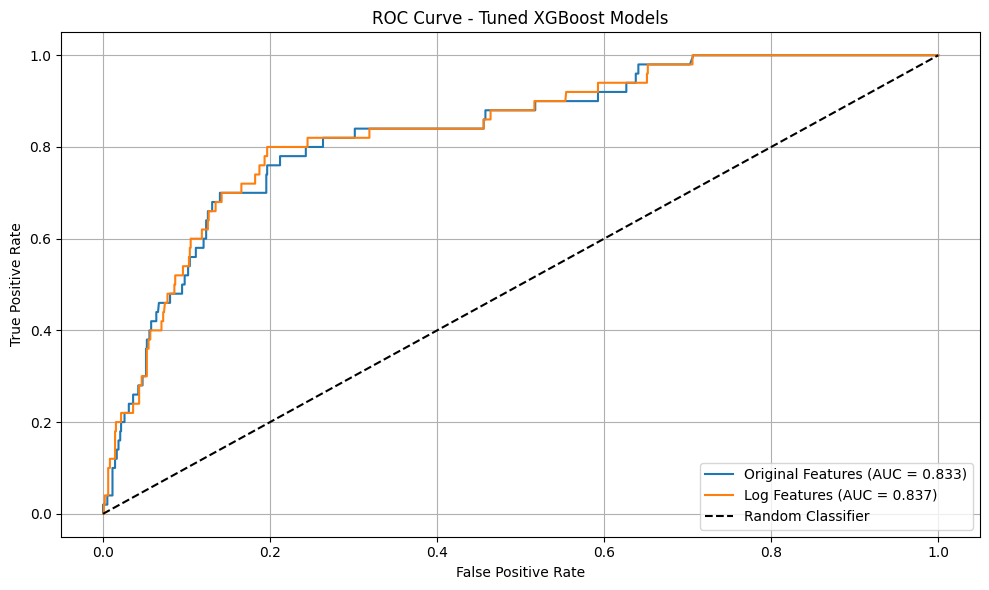

In [63]:
fpr_orig, tpr_orig, _ = roc_curve(y_test_orig, y_proba_xgb_orig_tuned)
fpr_log, tpr_log, _ = roc_curve(y_test_orig, y_proba_xgb_log_tuned)

auc_orig = roc_auc_score(y_test_orig, y_proba_xgb_orig_tuned)
auc_log = roc_auc_score(y_test_log, y_proba_xgb_log_tuned)

plt.figure(figsize=(10, 6))
plt.plot(fpr_orig, tpr_orig, label=f'Original Features (AUC = {auc_orig:.3f})')
plt.plot(fpr_log, tpr_log, label=f'Log Features (AUC = {auc_log:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()